In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url = "https://drive.google.com/u/0/uc?id=1RTTP6HXdY5clt1mWKLHHBXFvbH5Jsyg_&export=download&confirm=t&uuid=f90aed2b-688d-4fa2-be31-316fbf3ee936"

In [6]:
df= pd.read_csv(url, low_memory=False)
print(df.columns)

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')


<Figure size 2160x2880 with 0 Axes>

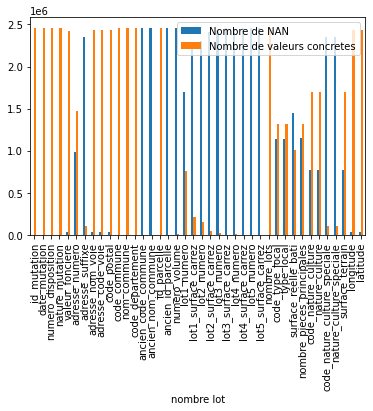

In [7]:
proportions = []
plt.figure(figsize = (30,40))
for c in df.columns:
    Nan_len = df[c].isnull().sum()
    column_len = df[c].shape[0]
    proportions.append([c, Nan_len, column_len-Nan_len])

proportions_df = pd.DataFrame(proportions, columns= ["nombre lot","Nombre de NAN", "Nombre de valeurs concretes"])
proportions_df.plot(x="nombre lot", y=["Nombre de NAN", "Nombre de valeurs concretes"], kind="bar")
plt.show()

Some columns are empty and others don't have enough values to do a proper analysis. So we will deleted them

In [8]:
df.drop(labels = ["adresse_suffixe","lot1_numero","lot1_surface_carrez",'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez','code_nature_culture_speciale','nature_culture_speciale','numero_volume','ancien_id_parcelle','ancien_code_commune', 'ancien_nom_commune'], axis=1, inplace = True)

<Figure size 2160x2880 with 0 Axes>

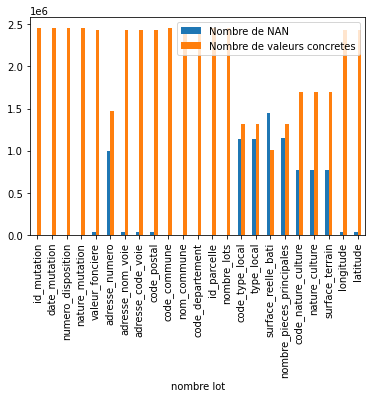

In [9]:
proportions = []
plt.figure(figsize = (30,40))
for c in df.columns:
    Nan_len = df[c].isnull().sum()
    column_len = df[c].shape[0]
    proportions.append([c, Nan_len, column_len-Nan_len])

proportions_df = pd.DataFrame(proportions, columns= ["nombre lot","Nombre de NAN", "Nombre de valeurs concretes"])
proportions_df.plot(x="nombre lot", y=["Nombre de NAN", "Nombre de valeurs concretes"], kind="bar")
plt.show()

In [10]:
df["type_local"].value_counts()

Maison                                      528257
Appartement                                 402271
Dépendance                                  298369
Local industriel. commercial ou assimilé     86937
Name: type_local, dtype: int64

We will also delete the rows where the area of the land and the lands values are unknown

In [11]:
df = df.loc[(~df["valeur_fonciere"].isna()) & (~df["surface_terrain"].isna()) & (~df["latitude"].isna()) & (~df["longitude"].isna())]

<Figure size 2160x2880 with 0 Axes>

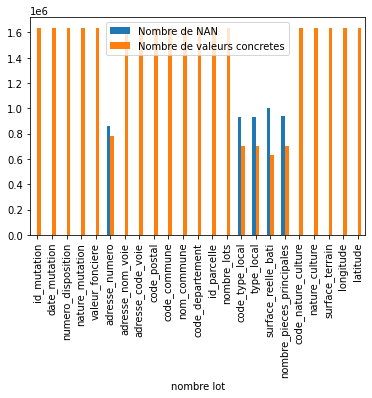

In [12]:
proportions = []
plt.figure(figsize = (30,40))
for c in df.columns:
    Nan_len = df[c].isnull().sum()
    column_len = df[c].shape[0]
    proportions.append([c, Nan_len, column_len-Nan_len])

proportions_df = pd.DataFrame(proportions, columns= ["nombre lot","Nombre de NAN", "Nombre de valeurs concretes"])
proportions_df.plot(x="nombre lot", y=["Nombre de NAN", "Nombre de valeurs concretes"], kind="bar")
plt.show()

In [13]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/df2020.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df[:10000].to_csv(f)

Mounted at /content/drive


In [14]:
df.head(5)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,FORTUNAT,B063,1250.0,01072,...,0,NaN,NaN,NaN,NaN,T,terres,1061.0,5.323540,46.171919
1,2020-2,2020-01-02,1,Vente,2175.0,NaN,TERRES DES CINQ SAULES,B124,1290.0,01203,...,0,NaN,NaN,NaN,NaN,BT,taillis simples,85.0,4.893436,46.251868
2,2020-2,2020-01-02,1,Vente,2175.0,NaN,BOIS DU CHAMP RION,B006,1290.0,01203,...,0,NaN,NaN,NaN,NaN,T,terres,1115.0,4.899919,46.235327
3,2020-2,2020-01-02,1,Vente,2175.0,NaN,EN COROBERT,B025,1290.0,01203,...,0,NaN,NaN,NaN,NaN,T,terres,1940.0,4.882347,46.246519
4,2020-2,2020-01-02,1,Vente,2175.0,NaN,TERRES DES CINQ SAULES,B124,1290.0,01203,...,0,NaN,NaN,NaN,NaN,T,terres,1148.0,4.894688,46.251820
